In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
df = pd.read_csv("/Users/jay/Work/stpw/datasets/datas.csv")

In [3]:
df.head()

,input,target
0,"['movl', 'movl', 'jmp', 'label', 'movl', 'jmp'...",6
1,"['movl', 'movl', 'jmp', 'label', 'cmpl', 'jg',...",5
2,"['movl', 'movl', 'jmp', 'label', 'movl', 'jmp'...",6
3,"['movl', 'cmpl', 'jle', 'movl', 'jmp', 'label'...",4
4,"['movl', 'cmpl', 'jg', 'cmpl', 'jle', 'subl', ...",3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   50000 non-null  object
 1   target  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [5]:
tokenizer = Tokenizer()
df['input'] = df['input'].astype(str)  # Ensure all inputs are string
tokenizer.fit_on_texts(df['input'])
X = tokenizer.texts_to_sequences(df['input'])
max_length = max(len(seq) for seq in X)
X = pad_sequences(X, maxlen=max_length, padding='post')
y = df['target'].values
print(X)
print(y)

[[ 2  2  6 ...  1  3 10]
 [ 2  2  6 ...  0  0  0]
 [ 2  2  6 ...  1  3  9]
 ...
 [ 2  2  6 ...  0  0  0]
 [ 2  2  6 ...  1  3 10]
 [ 2  3  8 ...  0  0  0]]
[6 5 6 ... 5 6 4]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 40000
Testing set size: 10000


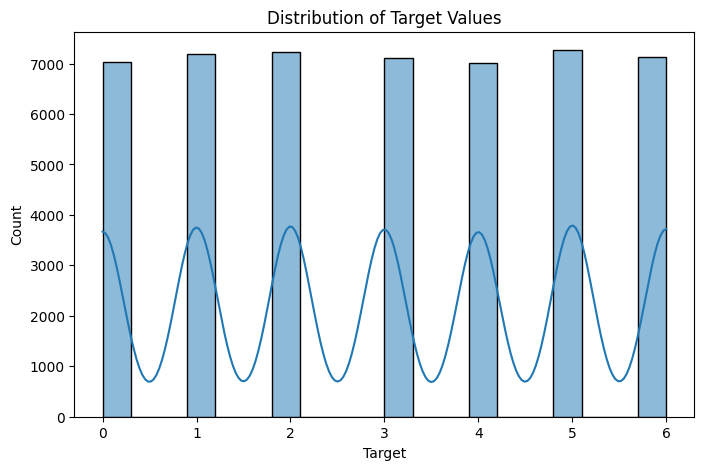

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['target'], bins=20, kde=True)
plt.title("Distribution of Target Values")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

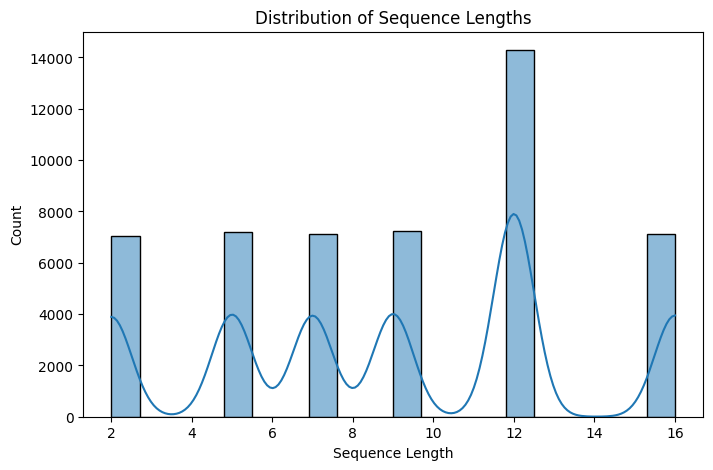

In [7]:
df['seq_length'] = df['input'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['seq_length'], bins=20, kde=True)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.show()


In [58]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.build(input_shape=(None, max_length))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 16, 128)        │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 14, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,129 (234.88 KB)

 Trainable params: 60,129 (234.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.0458 - mae: 0.3512 - mape: 25881546.0000 - val_loss: 4.6959e-06 - val_mae: 0.0017 - val_mape: 105925.2266
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.7560e-05 - mae: 0.0026 - mape: 105424.6094 - val_loss: 8.8825e-05 - val_mae: 0.0085 - val_mape: 53799.4414
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.9850e-04 - mae: 0.0099 - mape: 114389.4844 - val_loss: 6.3240e-07 - val_mae: 6.1420e-04 - val_mape: 13361.7363
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0846e-04 - mae: 0.0040 - mape: 35700.4648 - val_loss: 8.0231e-06 - val_mae: 0.0020 - val_mape: 18063.1836
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.1582e-05 - mae: 0.0022 - mape: 10345.3428 - val_loss: 2.7876e-06 - val_mae: 0.0012 - val_mape: 23230.0020
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0268e-05 - mae: 0.0015 - mape: 22389.6758 - val_loss: 1.5869e-04 - val_mae: 0.01

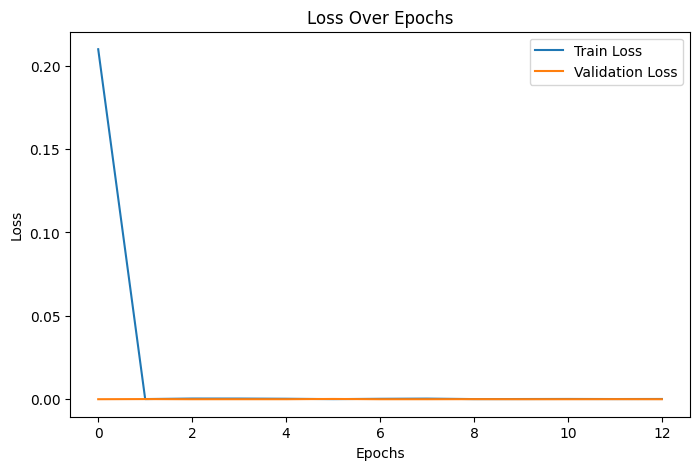

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


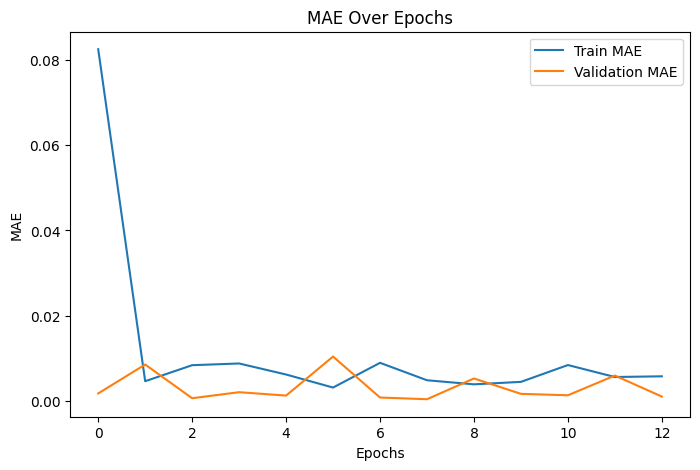

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("MAE Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()


In [61]:
test_loss, test_mae, test_mape = model.evaluate(X_test, y_test)

print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1772e-07 - mae: 3.7637e-04 - mape: 4943.8887
Test Loss (MSE): 0.0000
Test MAE: 0.0004
Test MAPE: 4865.65%


In [62]:
y_pred = model.predict(X_test)

# Display first 5 predictions vs actual values
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 3.00, Actual: 3
Predicted: 3.00, Actual: 3
Predicted: 2.00, Actual: 2
Predicted: 3.00, Actual: 3
Predicted: -0.00, Actual: 0


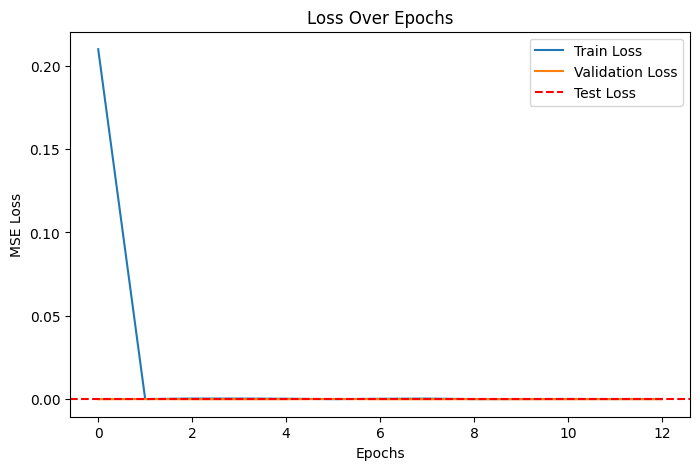

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [64]:
sample_input = ['movl', 'movl', 'jmp', 'label', 'movl', 'jmp', 'label', 'movl', 'subl', 'label', 'cmpl', 'je', 'addl', 'label', 'cmpl', 'jne']
sample_seq = tokenizer.texts_to_sequences(sample_input)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding='post')

prediction = model.predict(sample_padded)
print("Predicted target:", prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted target: -0.002535589


In [ ]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),  # Captures past & future dependencies
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

model.build(input_shape=(None, max_length))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
